# Projet 4 - Groupe 4 

In [1]:
import pandas as pd
dataset = pd.read_csv("dataset/train.csv")
dataset.head(5)

name   x1   x2   y1   y2       classname
0  2756.png   69  126  294  392  face_with_mask
1  2756.png  505   10  723  283  face_with_mask
2  2756.png   75  252  264  390   mask_colorful
3  2756.png  521  136  711  277   mask_colorful
4  6098.jpg  360   85  728  653    face_no_mask

In [2]:
print(dataset["classname"].value_counts())

face_with_mask              4180
mask_surgical               2430
mask_colorful               1876
face_no_mask                1569
face_other_covering         1372
eyeglasses                   914
hat                          823
sunglasses                   358
hair_net                     287
scarf_bandana                260
goggles                      192
helmet                       187
hijab_niqab                  173
face_shield                  160
hood                         159
face_with_mask_incorrect     150
balaclava_ski_mask           134
turban                        94
gas_mask                      55
other                         39
Name: classname, dtype: int64


In [3]:
dataset = dataset[dataset["classname"].isin(["face_with_mask",
                                    "face_no_mask"])]
dataset.head(5)

name   x1   x2   y1   y2       classname
0   2756.png   69  126  294  392  face_with_mask
1   2756.png  505   10  723  283  face_with_mask
4   6098.jpg  360   85  728  653    face_no_mask
7   4591.png  239    9  522  342  face_with_mask
11  5525.jpg  262   18  484  319    face_no_mask

### Répartition des classes Mask / No mask

In [4]:
dataset["classname"].value_counts()

face_with_mask    4180
face_no_mask      1569
Name: classname, dtype: int64

In [5]:
df_loc_im = dataset[dataset["name"]=="4591.png"]
df_loc_im

name   x1  x2   y1   y2       classname
7  4591.png  239   9  522  342  face_with_mask

In [86]:
from PIL import Image
import matplotlib

x1 = df_loc_im["x1"]
x2 = df_loc_im["x2"]
y1 = df_loc_im["y1"]
y2 = df_loc_im["y2"]

im_num = "4591"
im = Image.open(f"dataset/Medical mask/images/{im_num}.png")
im_crop = im.crop((x1,x2,y1,y2))

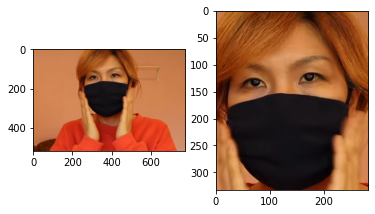

In [87]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im)
ax2.imshow(im_crop)

Image size :(283, 333)


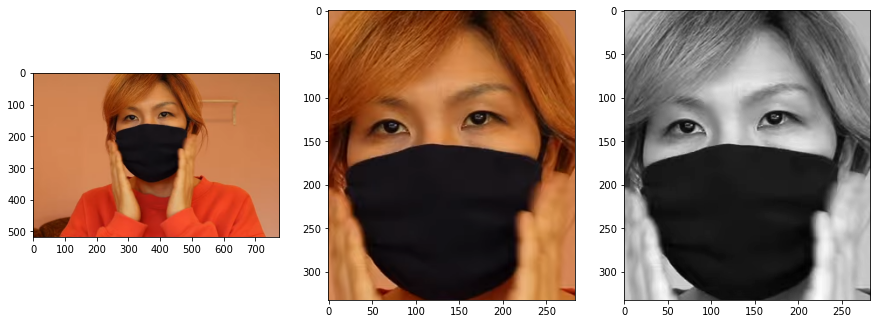

In [88]:
from PIL import Image, ImageOps

im_gray = ImageOps.grayscale(im_crop)
fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(15,15))
ax1.imshow(im)
ax2.imshow(im_crop)
ax3.imshow(im_gray,cmap="gray")

print(f"Image size :{im_gray.size}")

In [100]:
im_gray = im_gray.resize((50,50))
im_gray.size

(50, 50)

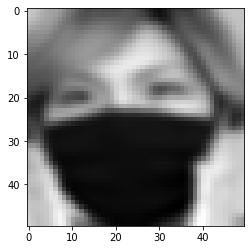

In [145]:
import numpy as np
import skimage.io
import skimage.color
import skimage.filters

im_gray_arr = np.asarray(im_gray)

blurred_image = skimage.filters.gaussian(im_gray_arr, sigma=1.0)
plt.imshow(blurred_image, cmap='gray')

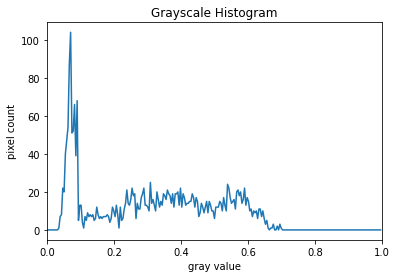

In [146]:
import skimage.io
import skimage.color
import skimage.filters

histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0,1))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0,1)
plt.show()


In [209]:
seuil = 9
max_bin_index = np.argmax(histogram)
max_grey_pxcount = bin_edges[max_bin_index+seuil]
max_grey_pxcount

0.10546875

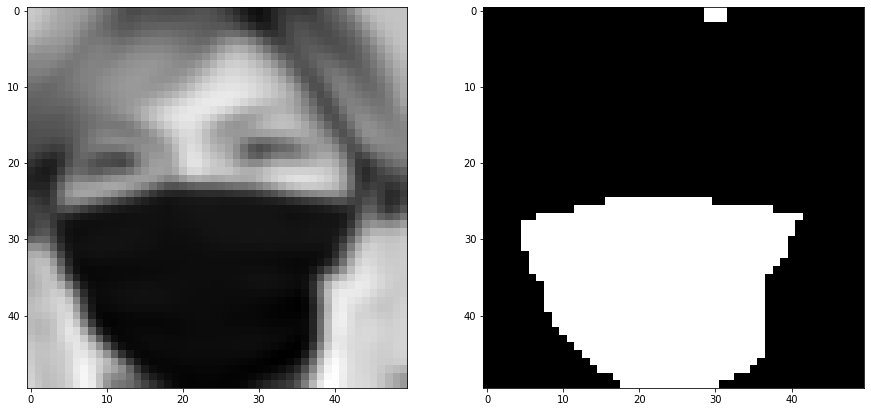

In [210]:
t = max_grey_pxcount
binary_mask = blurred_image < t

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
ax1.imshow(blurred_image, cmap='gray')
ax2.imshow(binary_mask, cmap='gray')